In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [2]:
#filepath = '/Users/michaelbroza/code/michabrz/DealMatch/raw_data/preprocessed_data_1march_2.xlsx'
filepath = '../raw_data/preprocessed_data_1march_2.xlsx'

df = pd.read_excel(filepath, index_col=0)

#16999 observations, 181 features -> deal_id und investor_id muss gedroppt werden, result ist label

df.shape

(16999, 177)

In [3]:
df.head()

,deal_id,result,num_tr__target_ebit,num_tr__target_ebitda,num_tr__target_revenue,cat_tr__deal_type_name_DISTRESSED,cat_tr__deal_type_name_MAJORITY,cat_tr__deal_type_name_MINORITY,cat_tr__deal_type_name_OTHER,cat_tr__deal_type_name_VC,...,investment_Northern_Europe,investment_Polynesia,investment_South_America,investment_South-eastern_Asia,investment_Southern_Africa,investment_Southern_Asia,investment_Southern_Europe,investment_Western_Africa,investment_Western_Asia,investment_Western_Europe
0,3,0,-1.400000,-1.344,-0.670000,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,6,0,4.250000,4.080,4.745455,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7,0,0.833333,0.800,-0.209091,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,2.250000,3.360,4.954545,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9,1,0.250000,0.240,-0.118182,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df.result.value_counts()

0    13409
1     3590
Name: result, dtype: int64

In [13]:

# Prepare X and y
X = df.drop(columns=['result', 'deal_id', 'investor_id'])
y = df['result']

# Hier nicht stratified???
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 6) # Holdout


baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.000495149838693143

In [14]:
# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000),
                                X_train,
                                y_train,
                                cv=10,
                                scoring=['recall'])

# Mean of accuracies
recall = log_cv_results['test_recall'].mean()

recall

0.12455766558591941

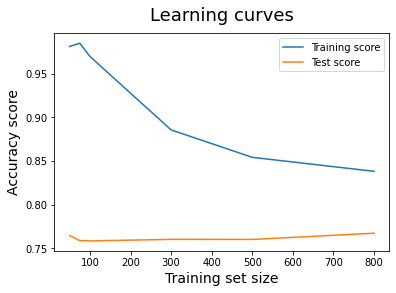

In [15]:

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(max_iter=1000),
    X=X_train,
    y=y_train,
    train_sizes=[25, 50, 75, 100, 300, 500, 800],
    cv=20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [16]:
df.head(1)

,deal_id,result,target_revenue,target_ebitda,target_ebit,target_DISTRESSED,target_MAJORITY,target_MINORITY,target_OTHER,target_VC,...,investment_Northern_Europe,investment_Polynesia,investment_South_America,investment_South-eastern_Asia,investment_Southern_Africa,investment_Southern_Asia,investment_Southern_Europe,investment_Western_Africa,investment_Western_Asia,investment_Western_Europe
0,3,0,-0.67,-1.344,-1.4,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [17]:
dict_test = df.iloc[0].to_dict()
df_test = pd.DataFrame(dict_test, index=['0',])
df_test.head()

,deal_id,result,target_revenue,target_ebitda,target_ebit,target_DISTRESSED,target_MAJORITY,target_MINORITY,target_OTHER,target_VC,...,investment_Northern_Europe,investment_Polynesia,investment_South_America,investment_South-eastern_Asia,investment_Southern_Africa,investment_Southern_Asia,investment_Southern_Europe,investment_Western_Africa,investment_Western_Asia,investment_Western_Europe
0,3.0,0.0,-0.67,-1.344,-1.4,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
# Instanciate the model
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# DAS HIER GIBT KEINE PROBABILITY AUS

# probability = log_model.predict(
#     test.drop(columns=['deal_id', 'result', 'investor_id']))[0]

# probability

In [20]:
X_test['prediction'] = log_model.predict(X_test)

In [21]:
X_test.prediction.value_counts(dropna = False)

0    4871
1     229
Name: prediction, dtype: int64

In [22]:
# 228 aus 5100 nur true?



X_ges = X_test.merge(df[['result']], how = 'left', left_index = True, right_index = True)

In [23]:
X_ges.result.sum()

1045

In [24]:
X_ges['correct'] = X_ges['result'] == X_ges['prediction'] 

In [25]:
# Ergebnis des Modells (% richtige Prediction)

a = X_ges.correct.value_counts(dropna = False)[1]/len(X_ges) * 100

In [26]:
# Ergebnis Baseline (% richtige Predictions, wenn ich immer sage, dass das Result 0 sein wird)

b = df.result.value_counts(dropna = False)[0]/len(df) * 100

In [27]:
a-b

0.4522226797654696

In [28]:
### --> Das Modell ist nur 0.5% besser als die Baseline.. 

## Versuch 1: Was bringt Stratifying alleine?

In [29]:
# Prepare X and y
X = df.drop(columns=['result', 'deal_id', 'investor_id'])
y = df['result']

# Hier nicht stratified???
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify=y,
                                                    random_state = 6) # Holdout


baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-1.8907959642433525e-09

In [30]:
# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000),
                                X_train,
                                y_train,
                                cv=10,
                                scoring=['recall'])

# Mean of accuracies
recall = log_cv_results['test_recall'].mean()

recall

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(max_iter=1000),
    X=X_train,
    y=y_train,
    train_sizes=[25, 50, 75, 100, 300, 500, 800, 1500],
    cv=20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

0.10545595396193005

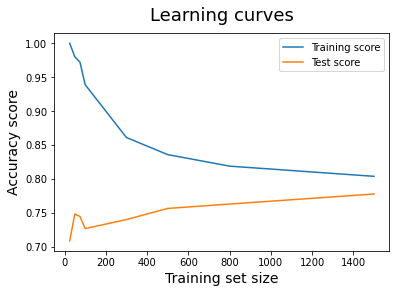

In [31]:

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(max_iter=1000),
    X=X_train,
    y=y_train,
    train_sizes=[25, 50, 75, 100, 300, 500, 800, 1500],
    cv=20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [32]:
df.head(1)

,deal_id,result,target_revenue,target_ebitda,target_ebit,target_DISTRESSED,target_MAJORITY,target_MINORITY,target_OTHER,target_VC,...,investment_Northern_Europe,investment_Polynesia,investment_South_America,investment_South-eastern_Asia,investment_Southern_Africa,investment_Southern_Asia,investment_Southern_Europe,investment_Western_Africa,investment_Western_Asia,investment_Western_Europe
0,3,0,-0.67,-1.344,-1.4,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [33]:
dict_test = df.iloc[0].to_dict()
df_test = pd.DataFrame(dict_test, index=['0',])
df_test.head()

,deal_id,result,target_revenue,target_ebitda,target_ebit,target_DISTRESSED,target_MAJORITY,target_MINORITY,target_OTHER,target_VC,...,investment_Northern_Europe,investment_Polynesia,investment_South_America,investment_South-eastern_Asia,investment_Southern_Africa,investment_Southern_Asia,investment_Southern_Europe,investment_Western_Africa,investment_Western_Asia,investment_Western_Europe
0,3.0,0.0,-0.67,-1.344,-1.4,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [34]:
# Instanciate the model
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
# DAS HIER GIBT KEINE PROBABILITY AUS

# probability = log_model.predict(
#     test.drop(columns=['deal_id', 'result', 'investor_id']))[0]

# probability

In [36]:
X_test['prediction'] = log_model.predict(X_test)

In [37]:
X_test.prediction.value_counts(dropna = False)

0    4921
1     179
Name: prediction, dtype: int64

In [38]:
# 228 aus 5100 nur true?



X_ges = X_test.merge(df[['result']], how = 'left', left_index = True, right_index = True)

In [39]:
X_ges.result.sum()

1077

In [40]:
X_ges.prediction.sum()

179

In [41]:
X_ges['correct'] = X_ges['result'] == X_ges['prediction'] 

In [42]:
# Ergebnis des Modells (% richtige Prediction)

a = X_ges.correct.value_counts(dropna = False)[1]/len(X_ges) * 100

In [43]:
# Ergebnis Baseline (% richtige Predictions, wenn ich immer sage, dass das Result 0 sein wird)

b = df.result.value_counts(dropna = False)[0]/len(df) * 100

In [44]:
a-b

0.8443795425105662

In [45]:
### --> Wieder nur 0.85% besser als die Baseline.. 

## Versuch 2: Stratified + andere Models?

In [46]:
# # Prepare X and y
# X = df.drop(columns=['result', 'deal_id', 'investor_id'])
# X = StandardScaler().fit_transform(X)

# y = df['result']

# # Hier nicht stratified???
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size = 0.3,
#                                                     stratify=y,
#                                                     random_state = 6) # Holdout


# baseline_model = DummyRegressor(strategy="mean") # Baseline
# baseline_model.fit(X_train, y_train) # Calculate value for stratgy
# baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

In [47]:

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     #"Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
# ]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     #GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]


#     # iterate over classifiers
# for name, clf in zip(names, classifiers):
#     clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     print(name + ': ' + str(score))


In [48]:
# clf = RandomForestClassifier(max_depth=100, n_estimators=1000, max_features=10)


# clf.fit(X_train, y_train)
# score = clf.score(X_test, y_test)
# print('randomforest' + ': ' + str(score))

In [49]:
# df.columns

## FeatureSelection??

In [50]:
# from sklearn.feature_selection import VarianceThreshold

In [51]:
# X_names = df.drop(columns=['result', 'deal_id', 'investor_id'])

In [52]:
# selector = VarianceThreshold(threshold = 0.15)
# selector.fit_transform(X_names)

In [53]:
# len(selector.get_feature_names_out())

In [54]:
# feats = selector.get_feature_names_out(input_features = X_names.columns)

In [55]:
# feats.tolist()

In [56]:
# X_names[feats.tolist()]

In [57]:
# df.var()['target_Netherlands']

In [58]:
df.target_Netherlands.value_counts(dropna = False)

0    16996
1        3
Name: target_Netherlands, dtype: int64

In [59]:
# selector.n_features_in_

In [60]:
# len(df.columns)

In [61]:
# # Prepare X and y
# #X = StandardScaler().fit_transform(X)

# X = X_names[feats.tolist()]
# y = df['result']

# # Hier nicht stratified???
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size = 0.3,
#                                                     stratify=y,
#                                                     random_state = 6) # Holdout


# baseline_model = DummyRegressor(strategy="mean") # Baseline
# baseline_model.fit(X_train, y_train) # Calculate value for stratgy
# baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

In [62]:
# X_train

In [63]:

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     #"Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
# ]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     #GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]


#     # iterate over classifiers
# for name, clf in zip(names, classifiers):
#     clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     print(name + ': ' + str(score))


In [64]:
# from sklearn.decomposition import PCA

# cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
#         '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
#         '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
#         '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

# pca = PCA(n_components=2)
# pca.fit(X_train)
# res_pca = pca.transform(X_test)
# unique_labels = np.unique(y_test)
# for index,unique_label in enumerate(unique_labels):
#     X_data = res_pca[y_test == unique_label]
#     plt.scatter(X_data[:,0], X_data[:,1],alpha=0.3,c=cols[index])
    
# plt.xlabel("PC 1")
# plt.ylabel("PC 2")
# plt.title("PCA Results")

## AUTOENCODER

In [65]:
# import math
# import pandas as pd
# import tensorflow as tf
# import keras_tuner.tuners as kt
# import matplotlib.pyplot as plt
# from tensorflow.keras import Model
# from tensorflow.keras import Sequential
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [66]:
# # Prepare X and y
# X = df.drop(columns=['result', 'deal_id', 'investor_id'])

# y = df['result']

# # Hier nicht stratified???
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size = 0.3,
#                                                     stratify=y,
#                                                     random_state = 6) # Holdout


# baseline_model = DummyRegressor(strategy="mean") # Baseline
# baseline_model.fit(X_train, y_train) # Calculate value for stratgy
# baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

In [67]:
# from sklearn.preprocessing import MinMaxScaler

# def scale_datasets(x_train, x_test):
#   """
#   Standard Scale test and train data
#   """
#   standard_scaler = MinMaxScaler()
#   x_train_scaled = pd.DataFrame(
#       standard_scaler.fit_transform(x_train),
#       columns=x_train.columns
#   )
#   x_test_scaled = pd.DataFrame(
#       standard_scaler.transform(x_test),
#       columns = x_test.columns
#   )
#   return x_train_scaled, x_test_scaled
  
# x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

In [68]:
## KOMPLETTER SCHEISS; FINGER WEG


# class AutoEncoders(Model):

#   def __init__(self, output_units):

#     super().__init__()
#     self.encoder = Sequential(
#         [
#           Dense(32, activation="relu"),
#           Dense(16, activation="relu"),
#           Dense(7, activation="relu")
#         ]
#     )

#     self.decoder = Sequential(
#         [
#           Dense(16, activation="relu"),
#           Dense(32, activation="relu"),
#           Dense(output_units, activation="sigmoid")
#         ]
#     )

# def call(self, inputs):

#   encoded = self.encoder(inputs)
#   decoded = self.decoder(encoded)
#   return decoded
  
# auto_encoder = AutoEncoders(len(x_train_scaled.columns))

# auto_encoder.compile(
#     loss='mae',
#     metrics=['mae'],
#     optimizer='adam'
# )

# history = auto_encoder.fit(
#     x_train_scaled, 
#     x_train_scaled, 
#     epochs=15, 
#     batch_size=32, 
#     validation_data=(x_test_scaled, x_test_scaled)
# )


## Predict Probabilities

In [69]:
# Prepare X and y
X = df.drop(columns=['result', 'deal_id', 'investor_id'])
X = StandardScaler().fit_transform(X)

y = df['result']

# Hier nicht stratified???
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify=y,
                                                    random_state = 6) # Holdout


baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-1.8907959642433525e-09

In [70]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    SVC(gamma=2, C=1, probability = True),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

scores = pd.DataFrame()

# iterate over classifiers
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    scores[name] = clf.predict_proba(X_test)[:,1]
    scores[name] = scores[name].round(decimals = 2)
    #print(name + ': ' + str(score))

scores['label'] = y_test.tolist()


Nearest Neighbors
Linear SVM
RBF SVM
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA


/Users/michaelbroza/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [71]:
scores.head()

,Nearest Neighbors,Linear SVM,RBF SVM,Decision Tree,Random Forest,Neural Net,AdaBoost,Naive Bayes,QDA,label
0,0.0,0.21,0.21,0.33,0.23,0.30,0.49,1.0,1.0,0
1,0.0,0.21,0.21,0.25,0.16,0.12,0.49,1.0,1.0,0
2,0.0,0.21,0.21,0.18,0.14,0.08,0.49,0.0,1.0,1
3,0.0,0.21,0.21,0.25,0.19,0.27,0.49,1.0,1.0,1
4,0.0,0.21,0.21,0.17,0.21,0.08,0.49,1.0,1.0,1


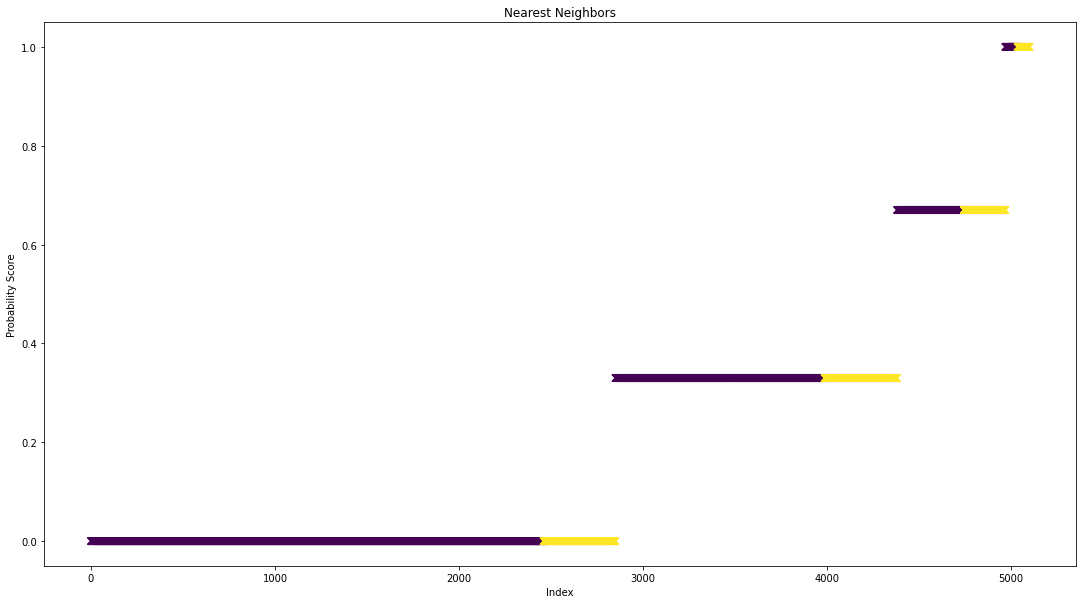

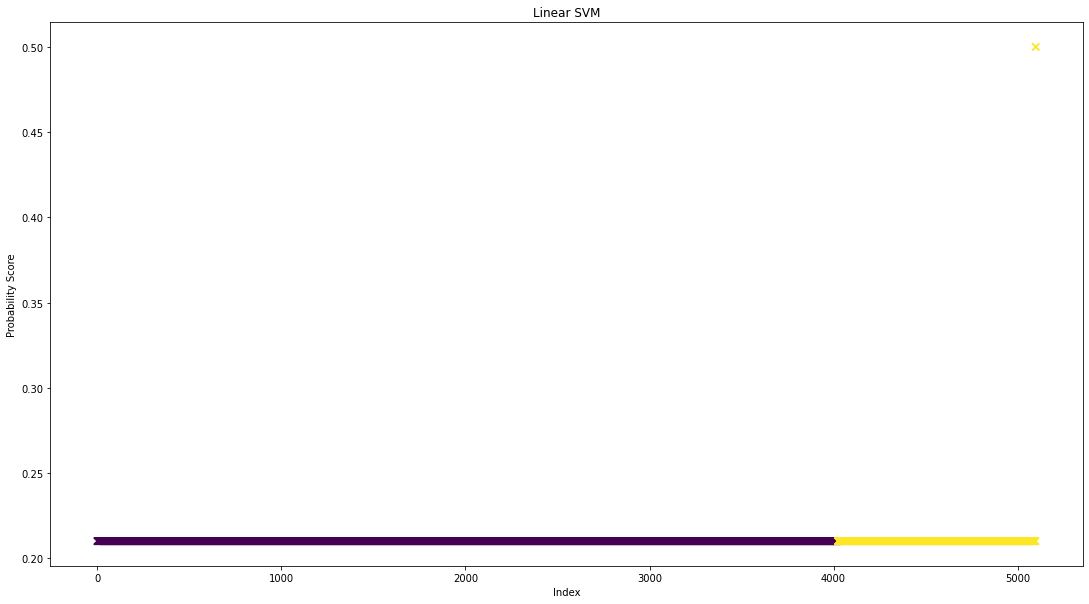

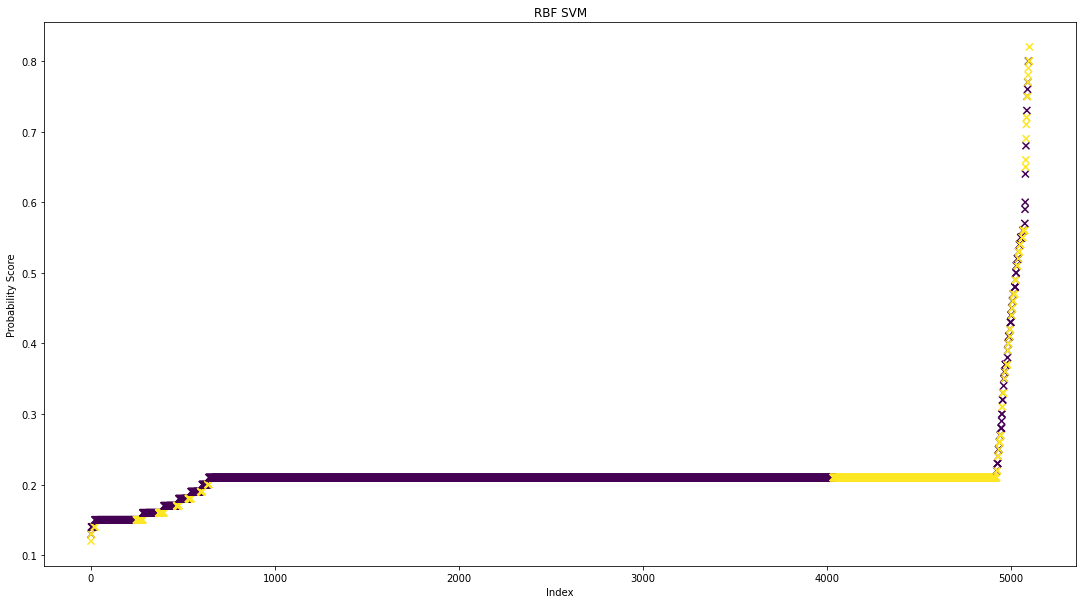

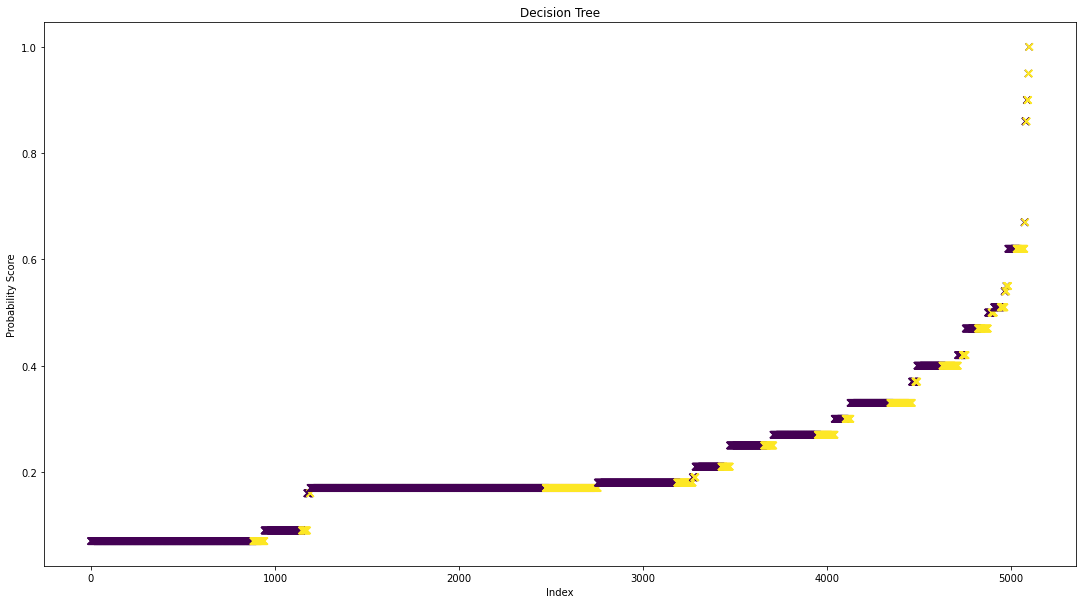

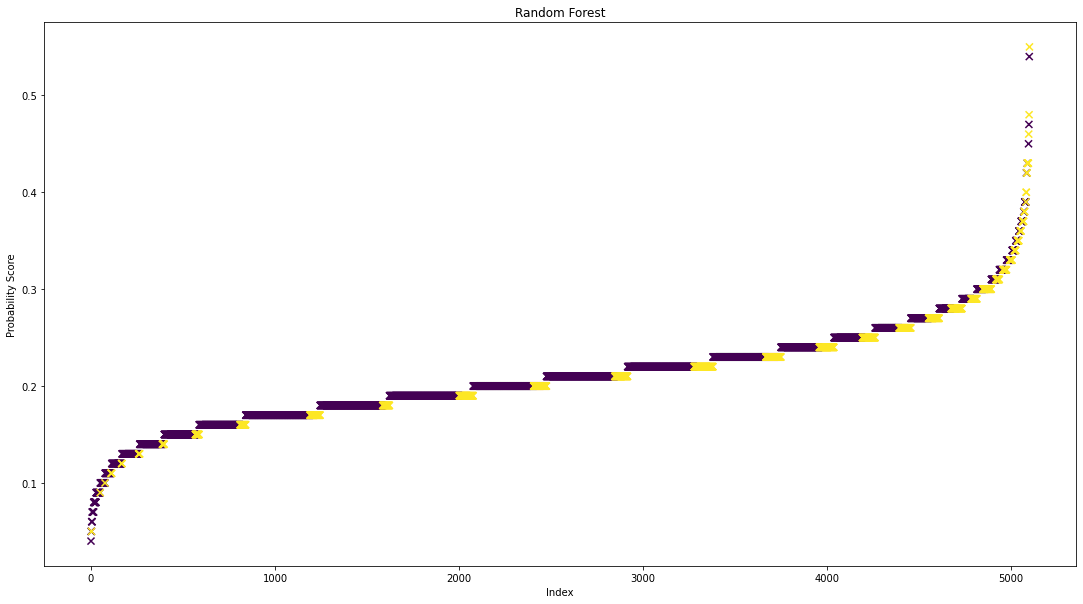

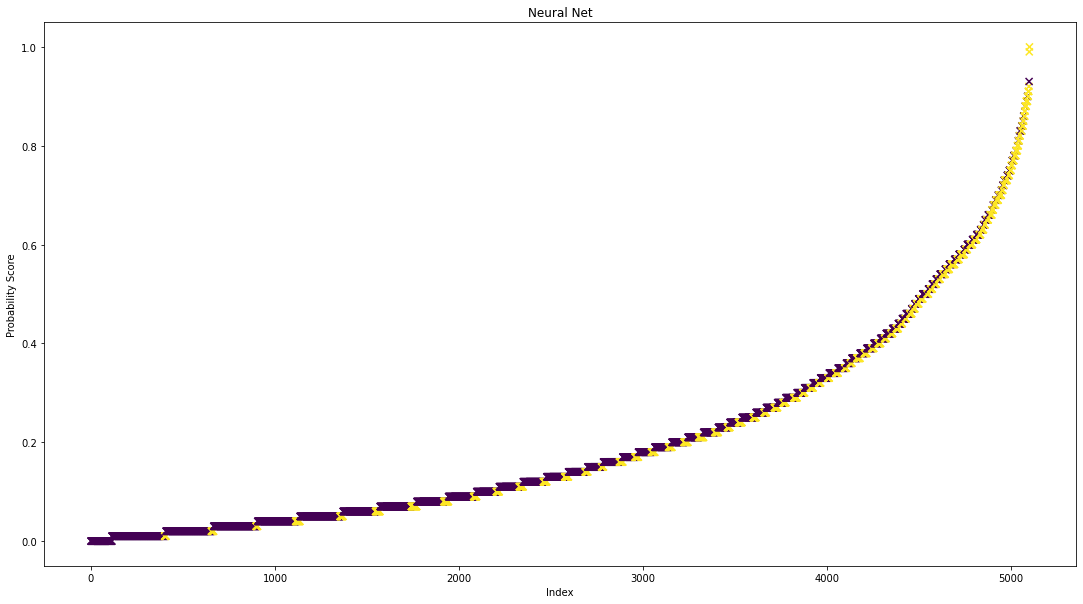

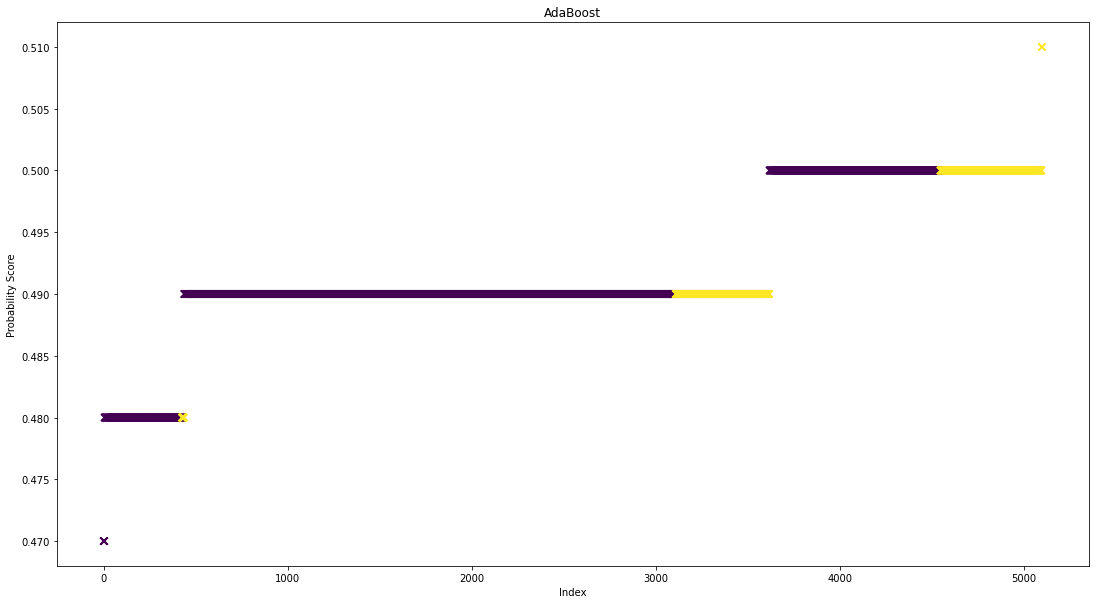

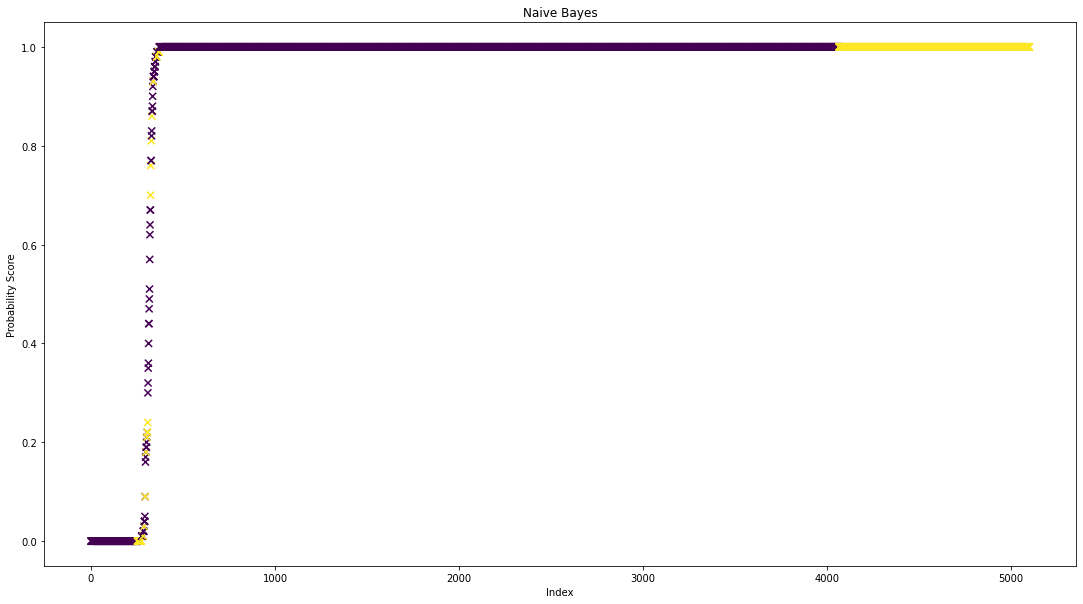

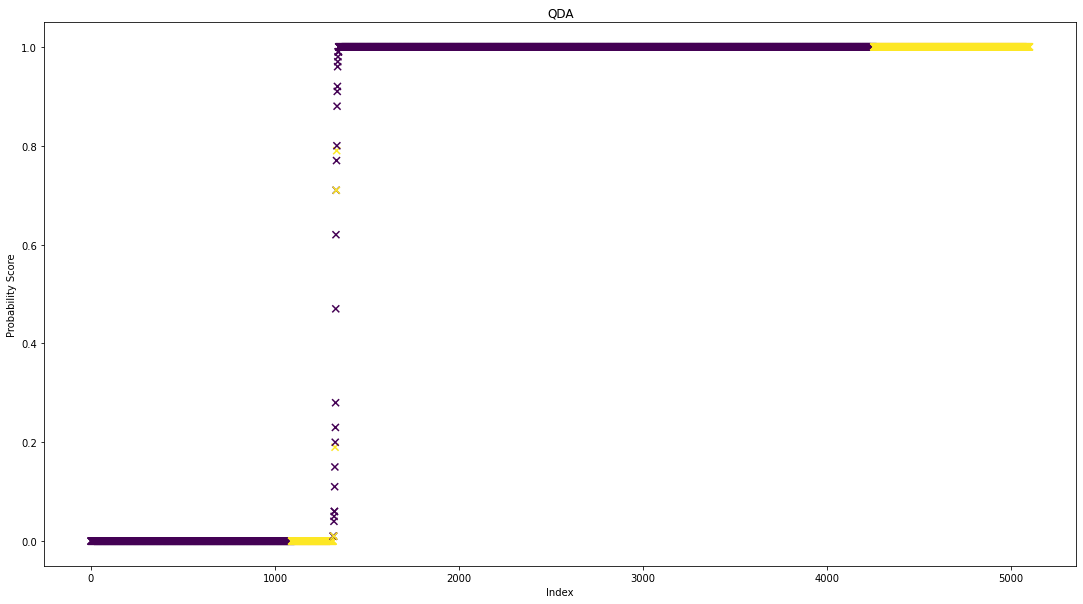

In [72]:
for num, name in enumerate(names): 
    df = scores.copy().sort_values([name, 'label']).reset_index()
    plt.figure(num, figsize = (18.5, 10))
    plt.scatter(df.index, df[name], c=df['label'], s = 50, marker = 'x')
    plt.title(name)
    plt.ylabel('Probability Score')
    plt.xlabel('Index')
    plt.gcf()

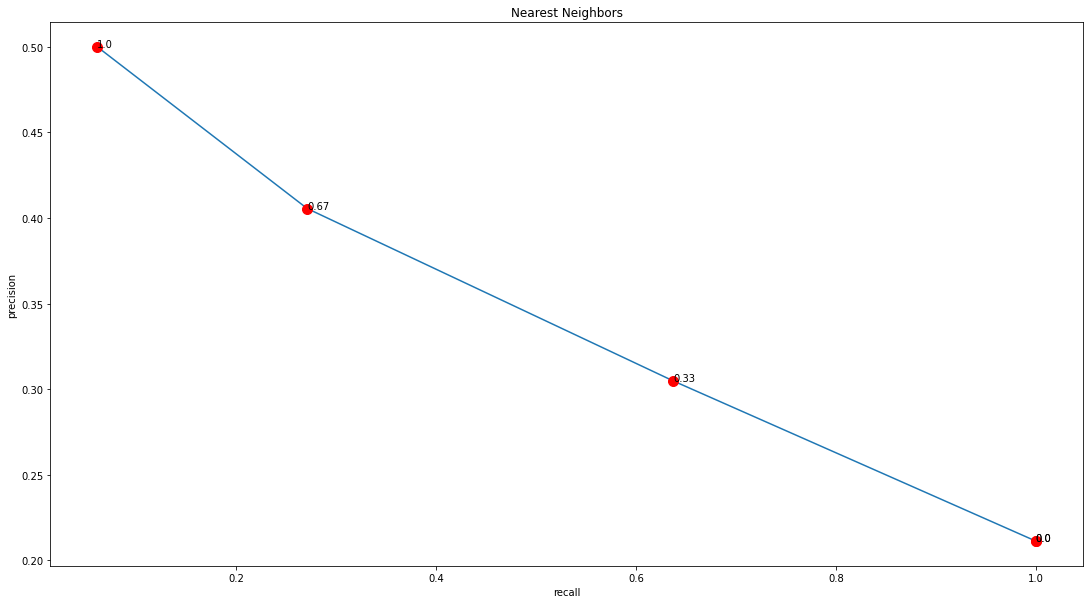

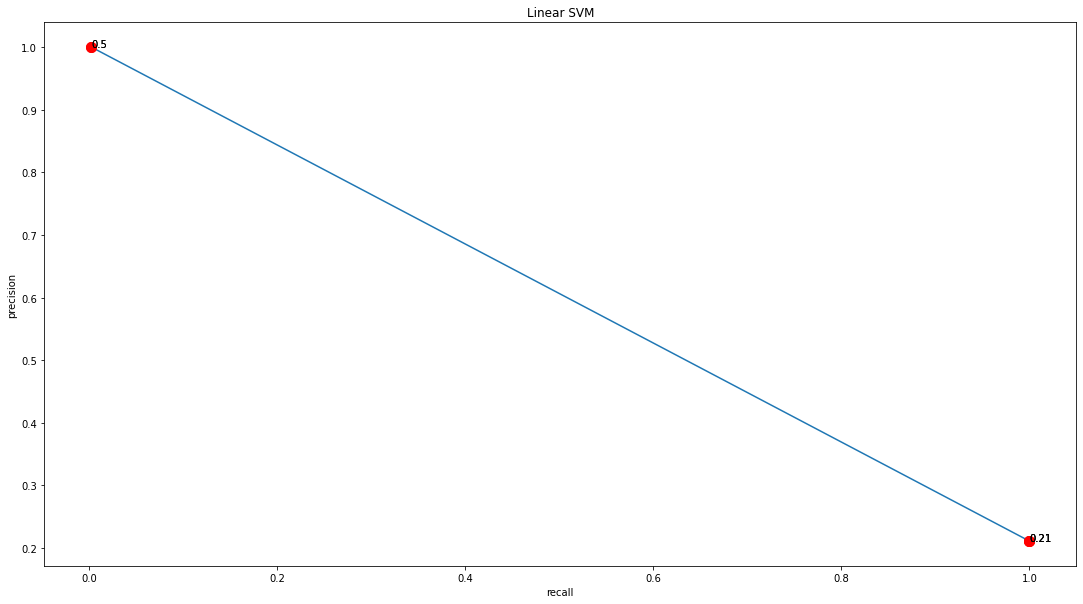

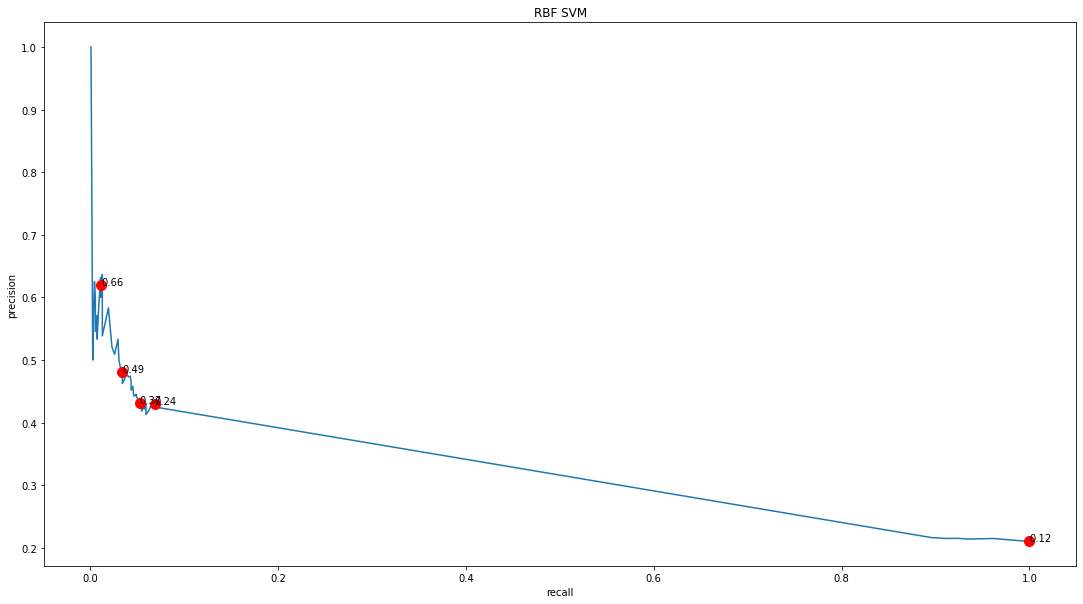

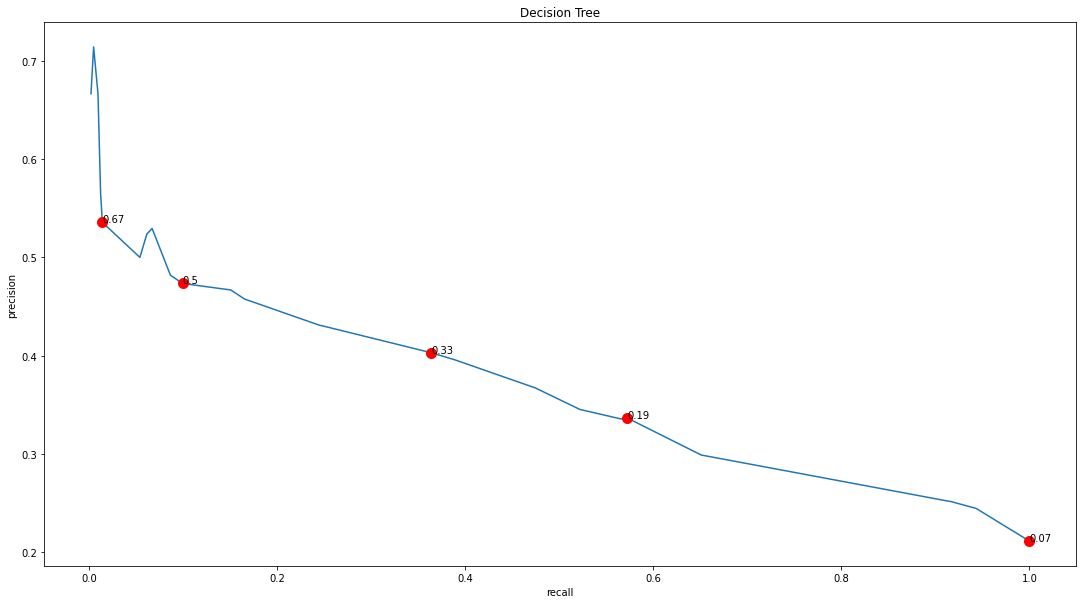

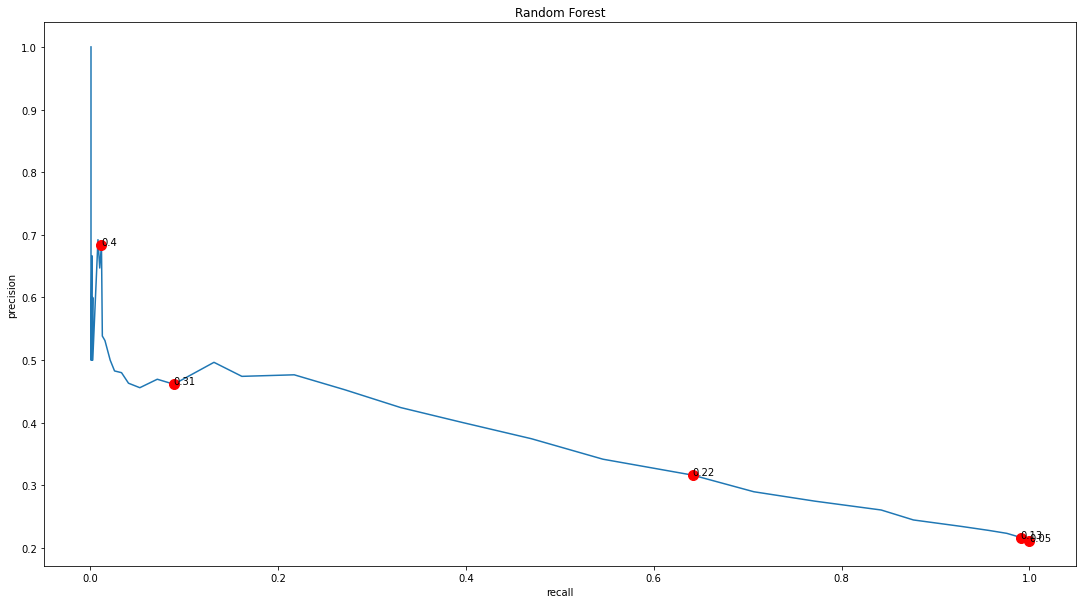

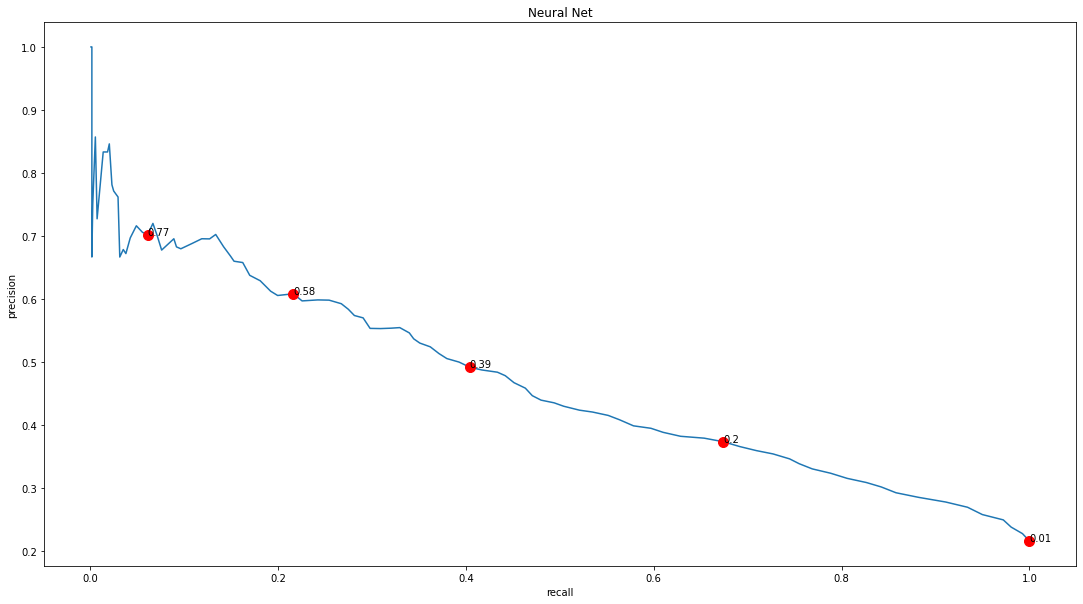

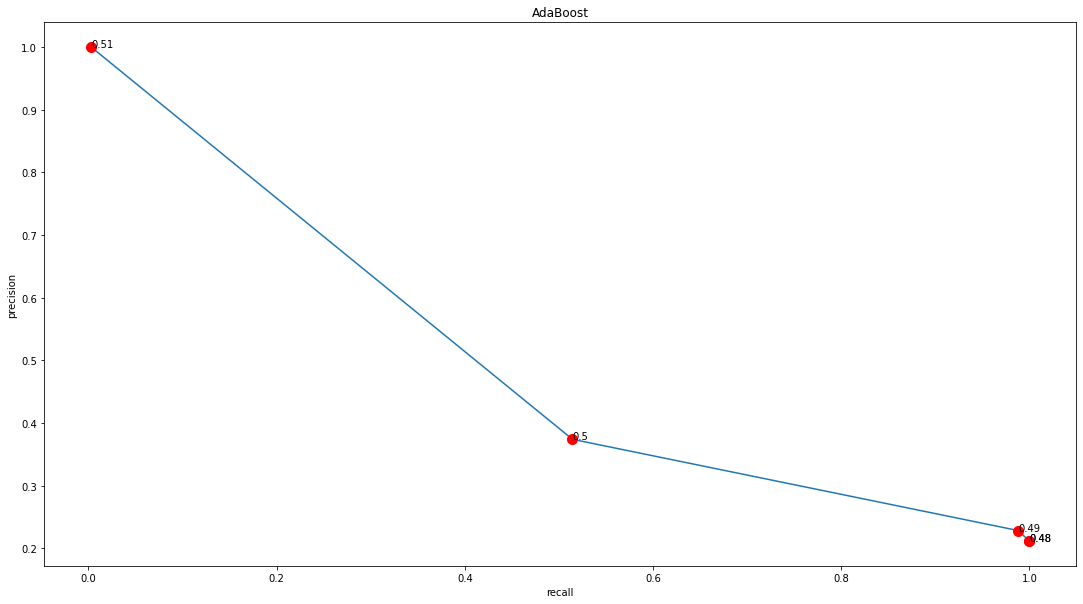

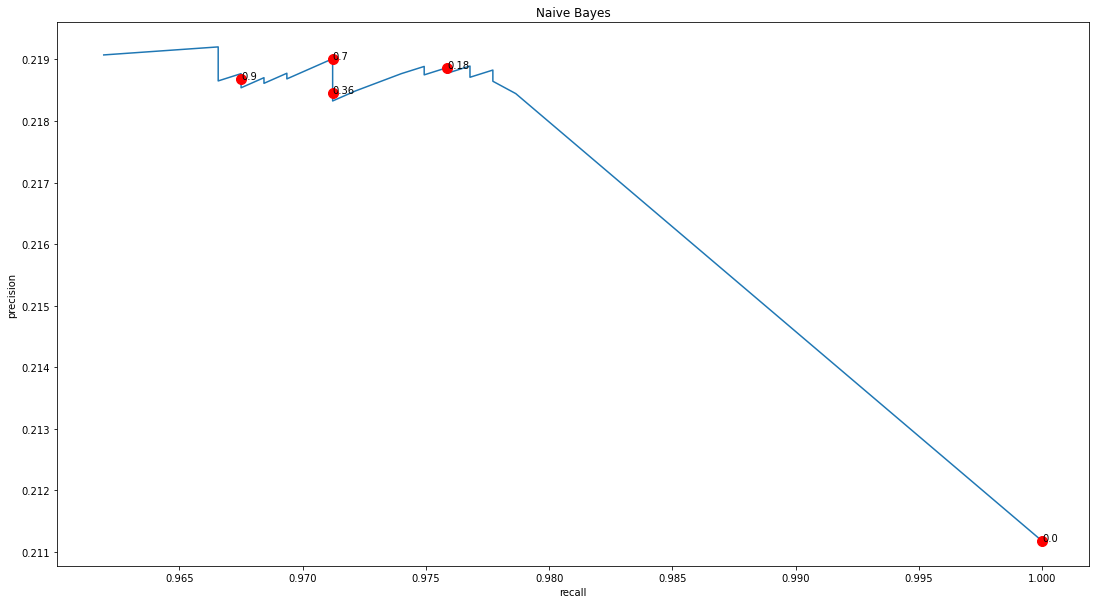

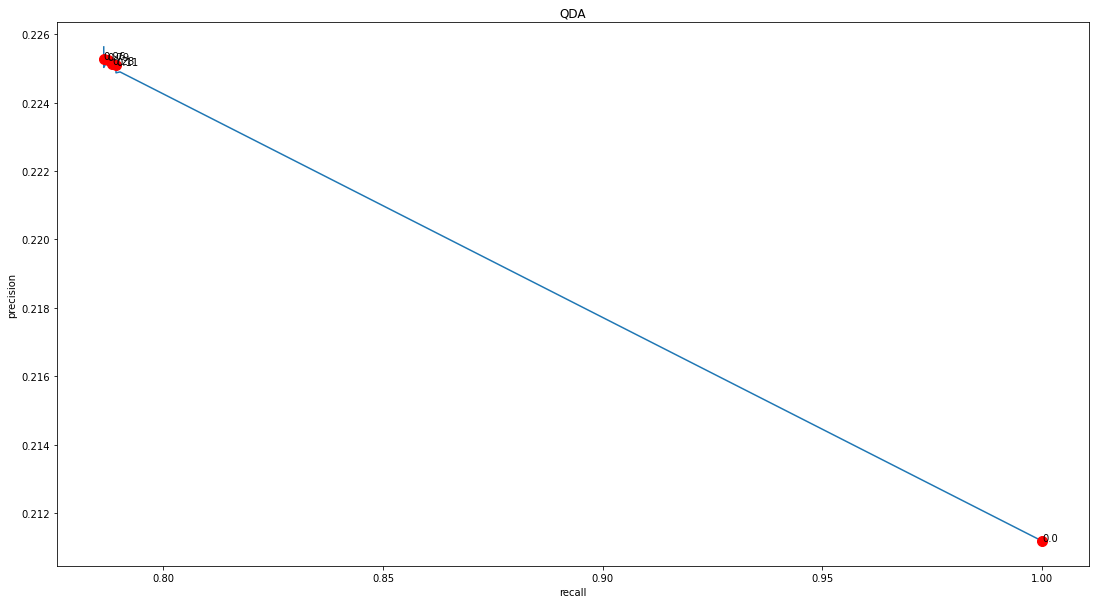

In [73]:
from sklearn.metrics import precision_recall_curve


for num, name in enumerate(names): 
    plt.figure(num, figsize = (18.5, 10))
    precision, recall, threshold = precision_recall_curve(scores['label'], scores[name])
    df_auc = pd.DataFrame({'threshold':threshold, 'precision': precision[:-1],'recall':recall[:-1]})
    plt.title(name)
    plt.plot(df_auc['recall'],df_auc['precision'])
    for i in range(5):
        step = len(df_auc)/5
        thresholdval = df_auc.threshold[np.floor(((i) * step))]
        plt.plot(df_auc.loc[df_auc['threshold'] == thresholdval]['recall'], df_auc.loc[df_auc['threshold'] == thresholdval]['precision'], marker='o', markersize=10, color='red')
        plt.annotate(str(thresholdval), (df_auc.loc[df_auc['threshold'] == thresholdval]['recall'], df_auc.loc[df_auc['threshold'] == thresholdval]['precision']))
    plt.ylabel('precision')
    plt.xlabel('recall')
    # plt.xlim(0, 1)
    # plt.ylim(0, 1)


In [74]:
a

79.72549019607843

In [79]:
X_train.shape

(11899, 178)

In [80]:
final_model = MLPClassifier(alpha=1, max_iter=1000)

final_model.fit(X_train, y_train)
score = final_model.score(X_test, y_test)
print('Neural Net: ' + str(score))

Neural Net: 0.8001960784313725


In [81]:
# 10-Fold Cross validate model
log_cv_results = cross_validate(MLPClassifier(alpha=1, max_iter=1000),
                                X_train,
                                y_train,
                                cv=10,
                                scoring=['recall'])

# Mean of accuracies
recall = log_cv_results['test_recall'].mean()

recall

0.28648105988743433

In [83]:
X_train

array([[-2.41799601e-01, -1.75047524e-01, -1.36455241e-01, ...,
        -2.14090802e-01,  2.38039377e+00,  3.16186838e-01],
       [-1.82655909e-01,  1.96284812e-03,  4.31870609e-02, ...,
        -2.14090802e-01, -4.20098562e-01,  3.16186838e-01],
       [-1.57591295e-01, -1.34817894e-01, -9.56274454e-02, ...,
        -2.14090802e-01, -4.20098562e-01, -3.16268699e+00],
       ...,
       [ 2.35307510e-01,  1.14850730e+00,  1.20677925e+00, ...,
        -2.14090802e-01, -4.20098562e-01,  3.16186838e-01],
       [-1.06362744e-01,  1.34720627e-01,  1.77918788e-01, ...,
        -2.14090802e-01,  2.38039377e+00,  3.16186838e-01],
       [ 6.38127883e-02,  1.96284812e-03,  4.31870609e-02, ...,
        -2.14090802e-01, -4.20098562e-01,  3.16186838e-01]])

In [ ]:
scores[scores['recall'] >= 0.8].threshold.max()

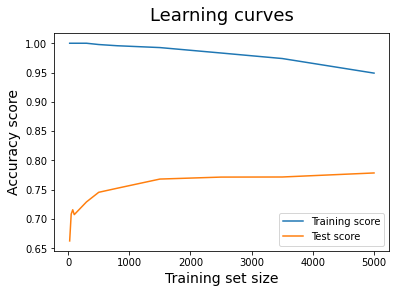

In [84]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator=MLPClassifier(alpha=1, max_iter=1000),
    X=X_train,
    y=y_train,
    train_sizes=[25, 50, 75, 100, 300, 500, 800, 1500, 2500, 3500, 5000],
    cv=10)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [13]:
#filepath = '/Users/michaelbroza/code/michabrz/DealMatch/raw_data/preprocessed_data_1march_2.xlsx'
filepath = '../raw_data/preprocessed_data_1march_2.xlsx'

df = pd.read_excel(filepath, index_col=0)

In [4]:
X = df.drop(columns=['result', 'deal_id'])
#X = StandardScaler().fit_transform(X)

y = df['result']

In [5]:
X.columns

Index(['num_tr__target_ebit', 'num_tr__target_ebitda',
       'num_tr__target_revenue', 'cat_tr__deal_type_name_DISTRESSED',
       'cat_tr__deal_type_name_MAJORITY', 'cat_tr__deal_type_name_MINORITY',
       'cat_tr__deal_type_name_OTHER', 'cat_tr__deal_type_name_VC',
       'cat_tr__deal_type_name_no_region', 'cat_tr__country_name_Austria',
       ...
       'investment_Northern_Europe', 'investment_Polynesia',
       'investment_South_America', 'investment_South-eastern_Asia',
       'investment_Southern_Africa', 'investment_Southern_Asia',
       'investment_Southern_Europe', 'investment_Western_Africa',
       'investment_Western_Asia', 'investment_Western_Europe'],
      dtype='object', length=175)

In [6]:
X_cop = X.copy()
y_cop = y.copy()

In [7]:
df_cop = df.copy()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model = MLPClassifier(alpha=1, max_iter=1000)

# Predict class probabilties
df_cop['prob_lost'], df_cop['prob_match'] = cross_val_predict(
    model, X_cop, y_cop, cv=5, method='predict_proba').T

# precision recall data
precision, recall, threshold = precision_recall_curve(
    y_cop, df_cop['prob_match'])

print(f'precision- {precision[:5]}')
print(f'recall- {recall[:5]}')
print(f'threshold- {threshold[:5]}')

precision- [0.21188691 0.2118404  0.2118529  0.21186541 0.21187791]
recall- [1.         0.99972145 0.99972145 0.99972145 0.99972145]
threshold- [0.00588107 0.00605277 0.00610053 0.00618595 0.00622887]


In [9]:
scores = pd.DataFrame({
    'threshold': threshold,
    'precision': precision[:-1],
    'recall': recall[:-1]
})  # Store in dataframe
scores.head()

,threshold,precision,recall
0,0.005881,0.211887,1.000000
1,0.006053,0.211840,0.999721
2,0.006101,0.211853,0.999721
3,0.006186,0.211865,0.999721
4,0.006229,0.211878,0.999721


Text(0.5, 0, 'recall')

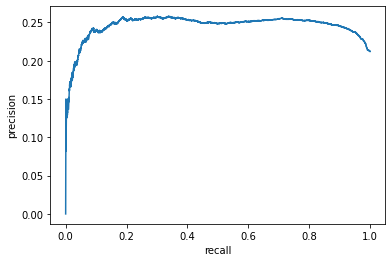

In [10]:
plt.plot(scores['recall'], scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [11]:
scores[scores['recall'] >= 0.8].threshold.max()

0.12555768053845437

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = MLPClassifier(alpha=1, max_iter=1000)
model.fit(X_cop, y_cop)


def custom_predict(X, custom_threshold):
    probs = model.predict_proba(
        X)  # Get likelihood of each sample being classified as 0 or 1
    expensive_probs = probs[:, 1]  # Only keep expensive likelihoods (1)
    return (expensive_probs > custom_threshold).astype(
        int)  # Boolean outcome converted to 0 or 1


updated_preds = custom_predict(
    X=X_cop, custom_threshold=0.12721494230095065)  # Update predictions

print(recall_score(y_cop, updated_preds))  # Rerun recall
print(precision_score(y_cop,
                      updated_preds))  # Rerun precision
print(f1_score(y_cop, updated_preds))  # Rerun f1


0.9197771587743733
0.27555703913877994
0.42406729596095805


In [13]:
import joblib

joblib.dump(model, 'model_supervised_MLP1.joblib')

['model_supervised_MLP1.joblib']

In [2]:
import joblib

In [6]:
os.getcwd()

'/Users/michaelbroza/code/michabrz/DealMatch/notebooks'

In [7]:
filepath = "/Users/michaelbroza/code/michabrz/DealMatch/DealMatch/model_targets.joblib"

In [9]:
file = "/Users/michaelbroza/code/michabrz/DealMatch/DealMatch/target_data.csv"

In [8]:
pipe_targets = joblib.load(filepath)

In [11]:
df_pred = pd.read_csv(file)